In [1]:
from dolfin import *
import mshr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

First create a simple FEM mesh of a circle:

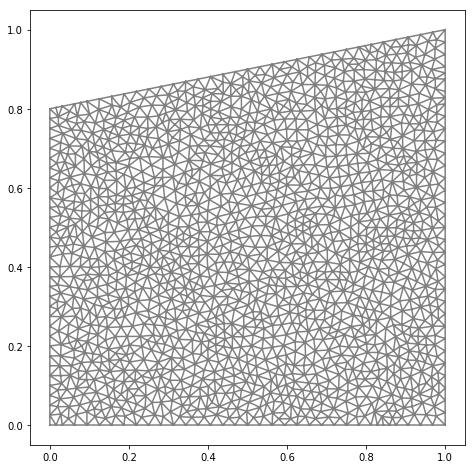

In [49]:
n=30
geometry=mshr.Polygon([Point(0.0,0.0),Point(1.0,0.0),Point(1.0,1.0),Point(0.0,0.8)])
#.Circle(Point(0.0,0.0),1.0)
mesh = mshr.generate_mesh(geometry,n)
plt.figure(figsize=(8,8))
plot(mesh)

Lets compute the eigenfunctions on this circle, and then deform it by stretching in the x-axis to form longer and longer elipses. Here we can see how the domain geometry affects the form of the eigenfunctions:

Discrete space size: 1631
12.0164047924 0.0
13.8933033006 0.0
15.9472472239 0.0
18.7290980852 0.0
22.4150483125 0.0
27.1930845451 0.0
33.2131507027 0.0
40.4368791734 0.0
44.8891235138 0.0
49.276123884 0.0
49.3284664628 0.0
53.1899351122 0.0
56.9425262102 0.0
59.737051146 0.0
60.8957364796 0.0
65.6773968864 0.0
71.6087889294 0.0
72.2757484457 0.0
79.0901488386 0.0
86.5035079066 0.0


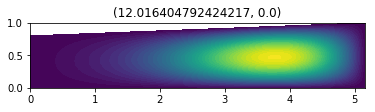

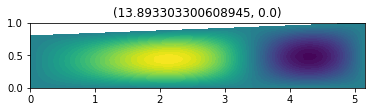

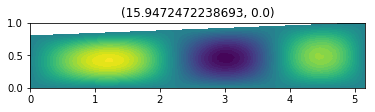

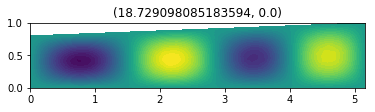

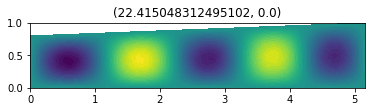

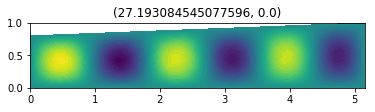

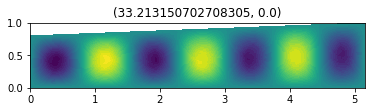

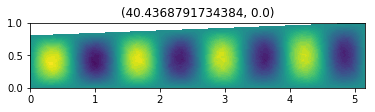

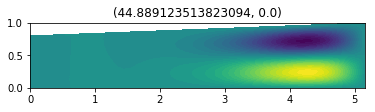

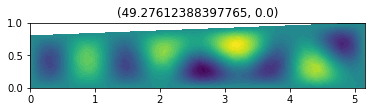

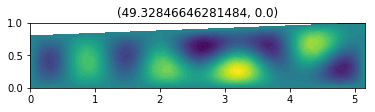

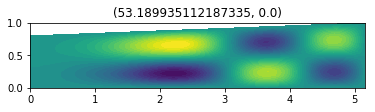

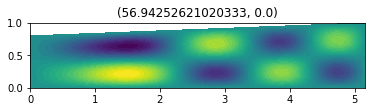

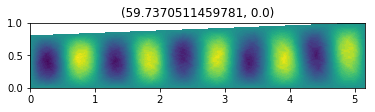

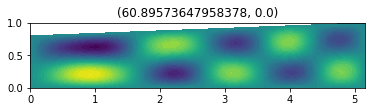

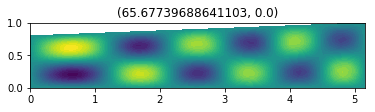

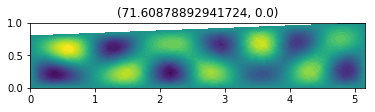

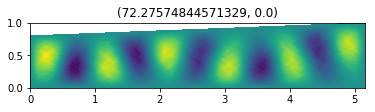

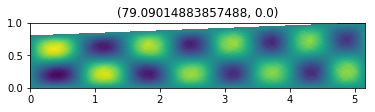

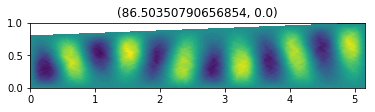

In [61]:
k = 4 #Which eigenfuncion should we plot, in order of smallest magnitude eigenvalue
ns = 1 #Number of times to stretch the circle

for i in range(ns):
    V = FunctionSpace(mesh, 'Lagrange', 1)
    bc = DirichletBC(V, 0.0, DomainBoundary())
    u, v = TrialFunction(V), TestFunction(V)

    a = inner(grad(u), grad(v))*dx
    L = Constant(0.0)*v*dx
    m = u*v*dx

    A, _ = assemble_system(a, L, bc)
    B = assemble(m)

    print "Discrete space size: %d"%V.dim()
    eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
    #prm = eigensolver.parameters
    #info(prm, True)
    eigensolver.parameters['spectrum'] = 'smallest magnitude'

    eigensolver.solve(20)
    eig = Function(V)
    eig_vec = eig.vector()
    
    for k in range(20):
        r, c, rx, cx = eigensolver.get_eigenpair(k)
        import numpy as np
        eig_vec[:] = rx #np.log(rx*rx)
        print r, c
        plt.figure()
        import numpy as np
        plot(eig)

        plt.title((r,c))
    
    # Stretch the domain by 20% in x-axis
    mesh.coordinates()[:,0] *= 1.2

In [54]:
print cx.array()[9]


0.0


/Users/timrudge/anaconda2/envs/fenics/lib/python2.7/site-packages/dolfin/cpp/la.py:1123: DeprecationWarning: GenericVector.array() is being deprecated, use GenericVector.get_local()
  "use GenericVector.get_local()", DeprecationWarning)
